<a href="https://colab.research.google.com/github/vishalveerareddy/GANS/blob/master/StyleGAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [53]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [0]:
!git clone https://github.com/NVlabs/stylegan.git


Cloning into 'stylegan'...
remote: Enumerating objects: 77, done.
remote: Total 77 (delta 0), reused 0 (delta 0), pack-reused 77
Unpacking objects: 100% (77/77), done.


In [0]:
!ls /content/stylegan/


config.py	     LICENSE.txt	    run_metrics.py
dataset_tool.py      metrics		    stylegan-teaser.png
dnnlib		     pretrained_example.py  training
generate_figures.py  README.md		    train.py


In [0]:
import sys
sys.path.insert(0, "/content/stylegan")
import dnnlib


In [0]:
import os
import pickle
import numpy as np
import PIL.Image
import dnnlib
import dnnlib.tflib as tflib
import config



In [57]:
tflib.init_tf()

    # Load pre-trained network.
    
url = 'https://drive.google.com/uc?id=1MOSKeGF0FJcivpBI7s63V9YHloUTORiF' # karras2019stylegan-ffhq-1024x1024.pkl
with dnnlib.util.open_url(url, cache_dir=config.cache_dir) as f:
   _G, _D, Gs = pickle.load(f)
   Gs.print_layers()
   rnd = np.random.RandomState()
   latents = rnd.randn(1, Gs.input_shape[1])
   fmt = dict(func=tflib.convert_images_to_uint8, nchw_to_nhwc=True)
   images = Gs.run(latents, None, truncation_psi=0.7, randomize_noise=True, output_transform=fmt)
   os.makedirs(config.result_dir, exist_ok=True)
   png_filename = os.path.join(config.result_dir, f'/content/drive/My Drive/images/example1.png')
   PIL.Image.fromarray(images[0], 'RGB').save(png_filename)



Gs                            Params    OutputShape         WeightShape     
---                           ---       ---                 ---             
latents_in                    -         (?, 512)            -               
labels_in                     -         (?, 0)              -               
lod                           -         ()                  -               
dlatent_avg                   -         (512,)              -               
G_mapping/latents_in          -         (?, 512)            -               
G_mapping/labels_in           -         (?, 0)              -               
G_mapping/PixelNorm           -         (?, 512)            -               
G_mapping/Dense0              262656    (?, 512)            (512, 512)      
G_mapping/Dense1              262656    (?, 512)            (512, 512)      
G_mapping/Dense2              262656    (?, 512)            (512, 512)      
G_mapping/Dense3              262656    (?, 512)            (512, 512)     

In [0]:
import cv2

In [0]:
from google.colab.patches import cv2_imshow


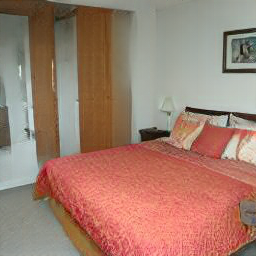

In [58]:
import cv2
cv2_imshow(cv2.cvtColor(images[0],cv2.COLOR_RGB2BGR))

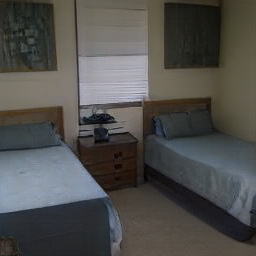

In [60]:
import random  
rnd = np.random.RandomState()


latents = rnd.randn(1, Gs.input_shape[1])
fmt = dict(func=tflib.convert_images_to_uint8, nchw_to_nhwc=True)
images = Gs.run(latents, None, truncation_psi=0.7, randomize_noise=True, output_transform=fmt)
cv2_imshow(cv2.cvtColor(images[0],cv2.COLOR_RGB2BGR))
